# Regression

This is a series of basic examples for running linear regression with StatWrap. It's more typical to use a package like sklearn or statsmodels for regression, but StatWrap is written to imitate Google Sheets/Excel. 

## Imports

Run the typical three starter lines in a Google Colab (suggested) or Jupyter notebook. 

In [1]:
!pip install --upgrade statwrap
import statwrap
%use_all

## Example 1 

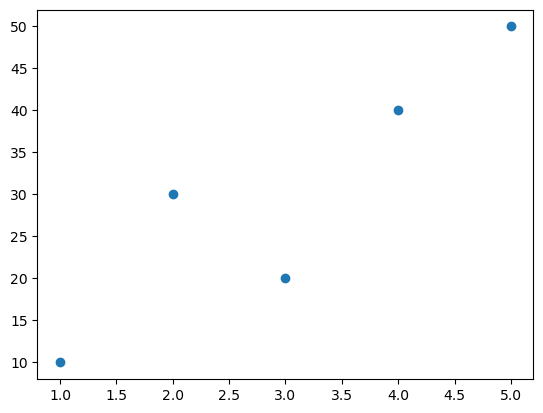

Correlation: 0.8999999999999999


In [2]:
x = 1, 2, 3, 4, 5
y = 10, 30, 20, 40, 50

scatter_plot(x,y)

print('Correlation:', correl(x,y))

In [3]:
# Direct Estimation

regression_line = linest(y, x)
regression_line

In [4]:
# predict y for x = 1 and x = 2

regression_line(1), regression_line(2)

(12.000000000000009, 21.000000000000007)

In [5]:
# Use correlation

correlation = correl(x,y)
sd_x = sd(x)
sd_y = sd(y)

slope = correlation * sd_y/sd_x

# y_average = intercept + slope*x_average 
intercept = average(y) - slope*average(x)

print(f'predicted Y = {intercept} + {slope}*X')

predicted Y = 3.0 + 9.0*X


## Example 2 - Read from CSV

Now we use a package called pandas to import data. Pandas does not have to be explicitly imported because of the `%use_all` command we used earlier. Later, we use a package called matplotlib to plot a regression line. Again, matplotlib doesn't have to be explicitly imported. 

In [7]:
url = 'https://raw.githubusercontent.com/alexanderthclark/Stats1101/main/Data/FatherSonHeights/pearson.csv'

# load a DataFrame
df = pd.read_csv(url)

# inspect first five rows
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


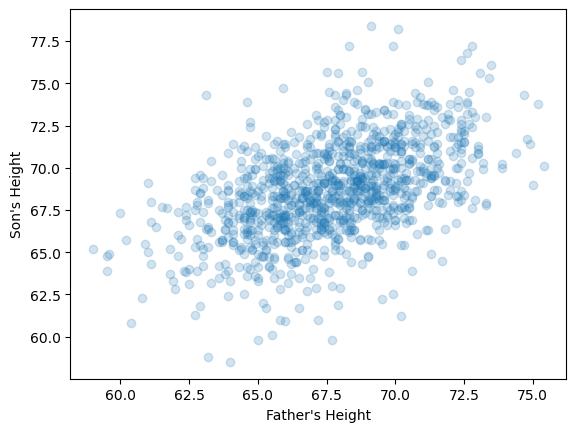

In [10]:
father = df.Father
son = df.Son

scatter_plot(father, son,
             xlabel = "Father's Height",
             ylabel = "Son's Height",
             alpha = 0.2) # reduce opacity of points

In [11]:
reg_line = linest(son, father) # y then x
reg_line

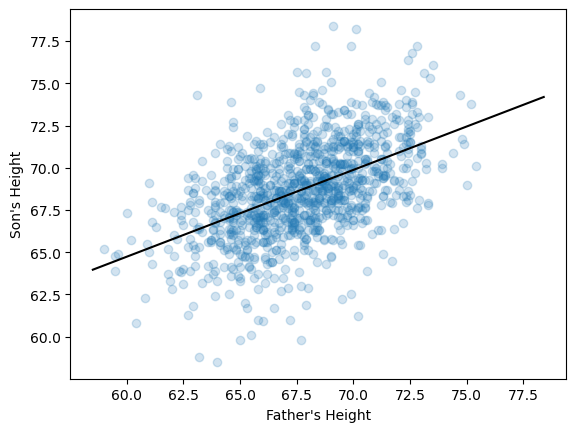

In [16]:
scatter_plot(father, son,
             xlabel = "Father's Height",
             ylabel = "Son's Height",
             alpha = 0.2, # reduce opacity of points
             show = False) # tell Python to let us add more stuff to the plot

# Add regression line using matplotlib
x_range = son.min(), son.max()
y_predictions = reg_line(son.min()), reg_line(son.max())
plt.plot(x_range, y_predictions, color = 'black')
plt.show()